# Imports

In [38]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import fftconvolve

from src.utils import filter_audio, get_audio, plot_audio_in_frequency, plot_audio_in_time, normalize_samples, get_fft_transform, write_audio

# Defining Paths

In [39]:
__file__ = 'end_to_end_processing.ipynb'
this_file_path = Path(__file__).absolute()
samples_path = this_file_path.parents[1] / 'audio-files' / 'samples'
impulses_responses_path = this_file_path.parents[1] / 'audio-files' / 'impulse-responses'
corrupted_audio_path = samples_path / 'corrupted_audio.wav'
long_hall_echo_path = impulses_responses_path / 'Large Long Echo Hall.wav'
results_path = this_file_path.parents[1] / 'audio-files' / 'results'

# Read Audio and Define Plots

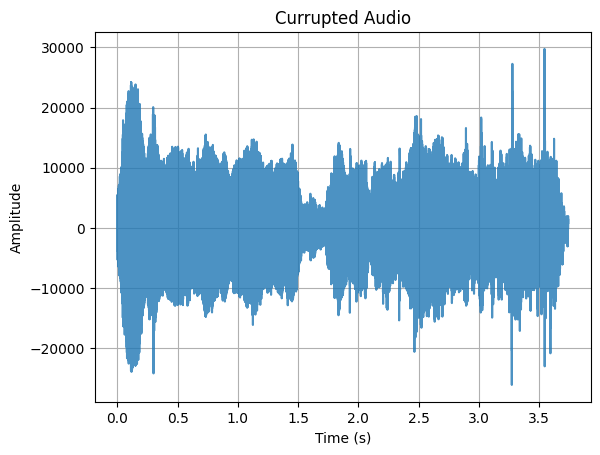

In [40]:
data, sample_rate, duration = get_audio(str(corrupted_audio_path))
plot_audio_in_time(data,sample_rate,duration, 'Currupted Audio')

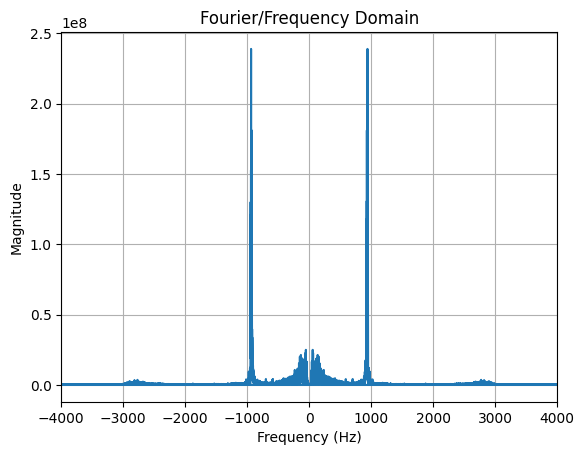

In [41]:
normalized_audio = normalize_samples(data)
yf, xf = get_fft_transform(normalized_audio, sample_rate, duration)
plot_audio_in_frequency(xf, yf)

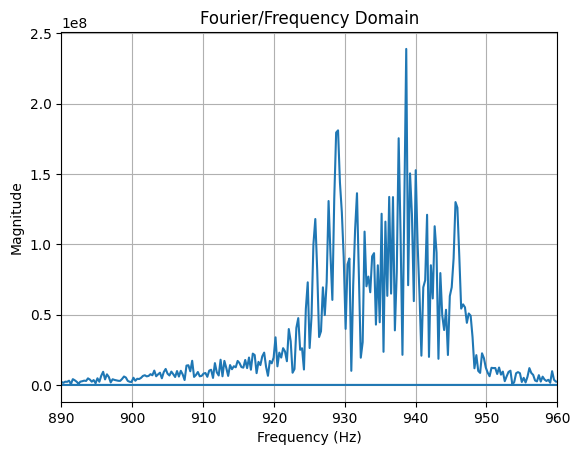

In [42]:
plot_audio_in_frequency(xf, yf,[890,960])

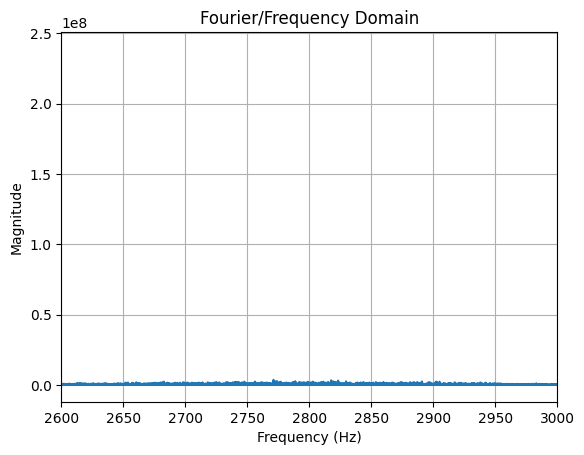

In [43]:
plot_audio_in_frequency(xf, yf,[2600, 3000])

# Remove Corrupting Frequency

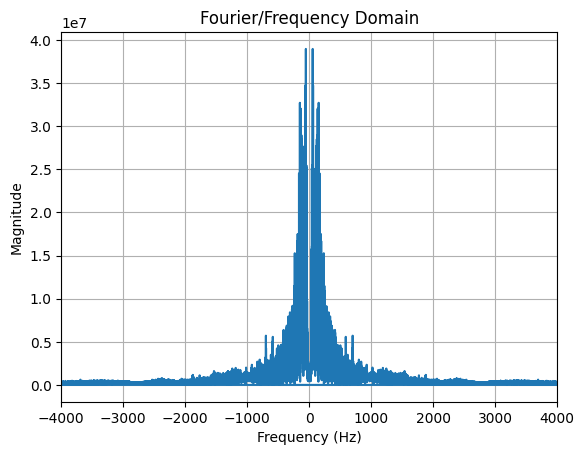

In [44]:
reconstructed_audio = filter_audio(data,[940, 2800],sample_rate,3)

normalized_recons = normalize_samples(reconstructed_audio)
yf, xf = get_fft_transform(normalized_recons, sample_rate, duration)
plot_audio_in_frequency(xf, yf)

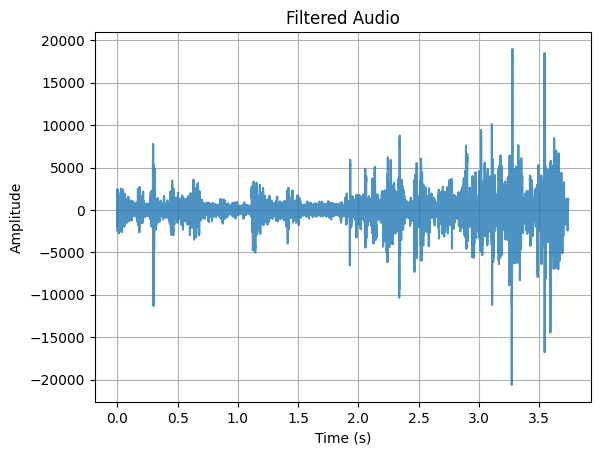

In [45]:
plot_audio_in_time(reconstructed_audio,sample_rate,duration, 'Filtered Audio')

## Saving Intermediate Result

In [46]:
normalized_filtered = normalize_samples(samples=reconstructed_audio, use_abs=True)

filtered_path = results_path / 'filtered_audio.wav'
write_audio(filtered_path, normalized_filtered, sample_rate)

# Add Echo Effect

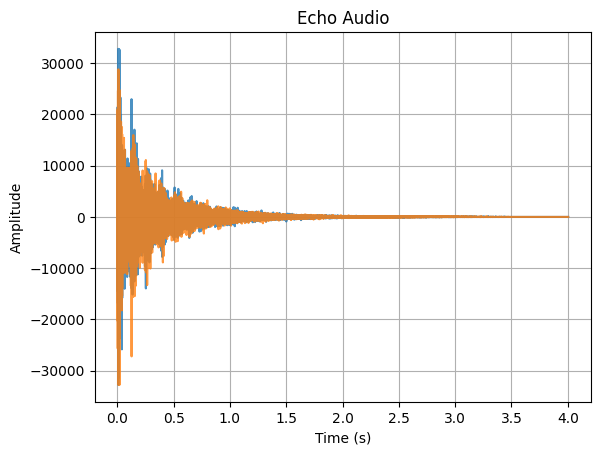

In [47]:
echo_data, echo_sample_rate, echo_duration = get_audio(long_hall_echo_path)
plot_audio_in_time(echo_data, echo_sample_rate, echo_duration, 'Echo Audio')

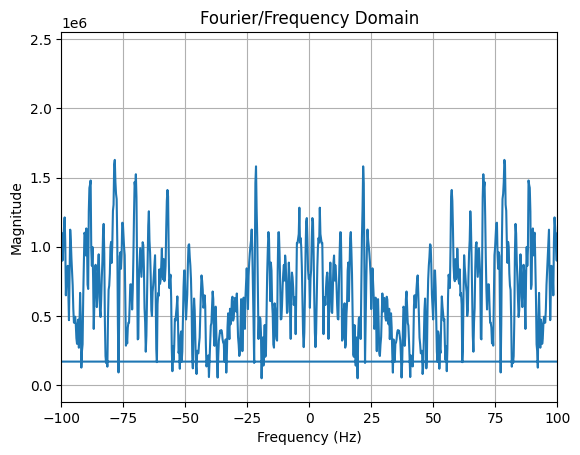

In [48]:
normalized_echo = normalize_samples(echo_data[:,1])
yf_echo, xf_echo = get_fft_transform(normalized_echo, echo_sample_rate, echo_duration)
plot_audio_in_frequency(xf_echo, yf_echo[:-1],[-100,100])

In [49]:
audio_echoed = fftconvolve(reconstructed_audio,echo_data[:,0])
audio_echoed_normalized = normalize_samples(samples = audio_echoed, use_abs=True)

In [50]:
echo_filtered_path = results_path / 'echoed_filtered_audio.wav'
write_audio(echo_filtered_path, audio_echoed_normalized, sample_rate)